6.4 Machine Learning Pt. 1 

This Script contains the following 

1. Importing Libraries and Data 

3. Data Prep for Regression Analysis

4. Regression Analysis

1. Importing Libraries and Data

In [6]:
!pip install scikit-learn

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [6]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [7]:
df_cacao_cleaned = pd.read_csv("../Data/Updated/df_cacao_cleaned.csv")

In [11]:
df_cacao_cleaned['Cocoa_Percent'] = df_cacao_cleaned['Cocoa_Percent'].str.replace('%', '').astype(float) / 100

In [44]:
print(df_cacao_cleaned)

       Company Specific_Bean_Origin  Reference_Number  Review_Date  \
0     A. Morin          Agua Grande              1876         2016   
1     A. Morin                Kpime              1676         2015   
2     A. Morin                Cusco              1676         2015   
3     A. Morin                Akata              1680         2015   
4     A. Morin               Quilla              1704         2015   
...        ...                  ...               ...          ...   
1648    Zotter                 Kivu               749         2011   
1649    Zotter         Kerala State               749         2011   
1650    Zotter         Kerala State               781         2011   
1651    Zotter                Bahia               486         2010   
1652    Amedei        Toscano Black                40         2006   

      Cocoa_Percent Company_Location  Rating  Bean_Type  \
0              0.63           France    3.75      Blend   
1              0.70           France    2

2. Data Prep for Regression Analysis

C:\Users\Owner\AppData\Local\Temp\ipykernel_7260\1018092025.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_cacao_cleaned['Cocoa_Percent'], bins=25)


<Axes: xlabel='Cocoa_Percent', ylabel='Density'>

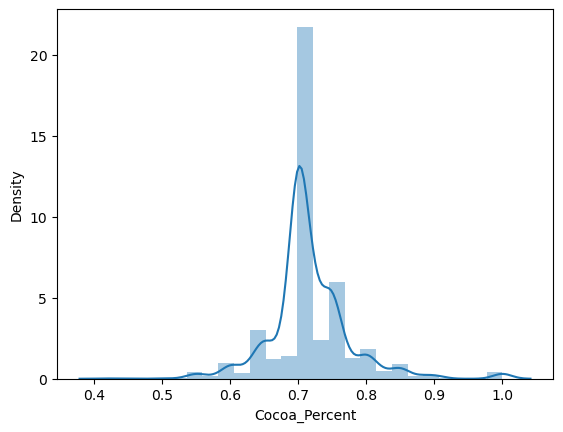

In [46]:
# Show extreme values
sns.distplot(df_cacao_cleaned['Cocoa_Percent'], bins=25)

In [48]:
df_cacao_cleaned['Cocoa_Percent'].mean()

0.7168088324258924

In [50]:
df_cacao_cleaned['Cocoa_Percent'].median()

0.7

In [52]:
df_cacao_cleaned['Cocoa_Percent'].max()

1.0

In [54]:
df_cacao_cleaned['Cocoa_Percent'].min()

0.42

3. Regression Analysis

Hypothesis

If the cocao percent is higher than the rating will likely be higher

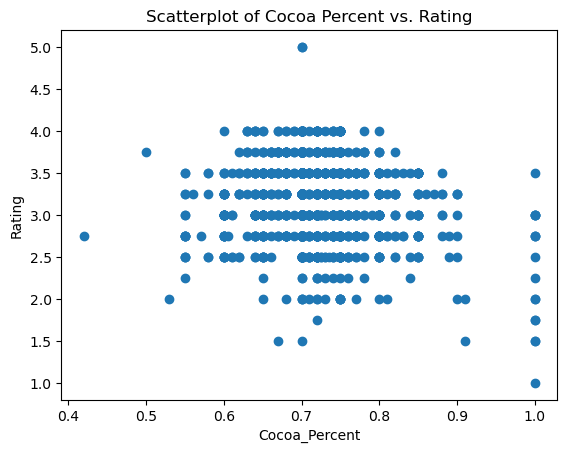

In [64]:
plt.scatter(df_cacao_cleaned['Cocoa_Percent'], df_cacao_cleaned['Rating'])
plt.xlabel('Cocoa_Percent')
plt.ylabel('Rating')
plt.title('Scatterplot of Cocoa Percent vs. Rating')
plt.show()

In [66]:
X = df_cacao_cleaned['Cocoa_Percent'].values.reshape(-1,1)
y = df_cacao_cleaned['Rating'].values.reshape(-1,1)

In [70]:
X

array([[0.63],
       [0.7 ],
       [0.7 ],
       ...,
       [0.62],
       [0.65],
       [0.7 ]])

In [72]:
y

array([[3.75],
       [2.75],
       [3.  ],
       ...,
       [3.25],
       [3.  ],
       [5.  ]])

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [76]:
regression = LinearRegression()

In [78]:
regression.fit(X_train, y_train)

LinearRegression()

In [80]:
y_predicted = regression.predict(X_test)

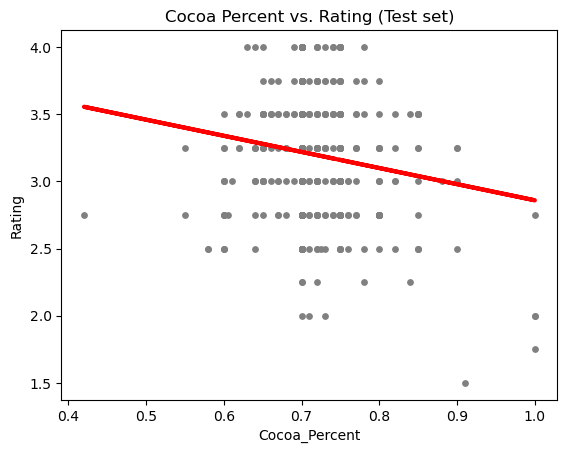

In [82]:
plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs. Rating (Test set)')
plot_test.xlabel('Cocoa_Percent')
plot_test.ylabel('Rating')
plot_test.show()

In [84]:
rmse = mean_squared_error(y_test, y_predicted)
r2 = r2_score(y_test, y_predicted)

In [86]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.1998998]]
Mean squared error:  0.19442068416187983
R2 score:  0.026139736716540463


Slope: The slope of the regression line is approximately -1.1999. This is a negative relationship which does not align with the hypothesis

Mean Squared Error (MSE): The MSE is approximately 0.1944. A lower MSE indicates a better fit.

R2 Score: The R2 score is approximately 0.8261. An R2 score closer to 1 means a better fit.

In [92]:
y_predicted

array([[3.1586568 ],
       [3.1586568 ],
       [3.09866181],
       [3.1586568 ],
       [3.33864177],
       [3.09866181],
       [3.1586568 ],
       [3.1586568 ],
       [3.21865179],
       [3.21865179],
       [3.21865179],
       [3.1586568 ],
       [3.1586568 ],
       [3.21865179],
       [3.1586568 ],
       [3.21865179],
       [3.21865179],
       [3.09866181],
       [3.1946538 ],
       [3.1946538 ],
       [3.21865179],
       [3.26664778],
       [3.21865179],
       [3.03866682],
       [3.1946538 ],
       [3.21865179],
       [3.21865179],
       [3.27864678],
       [3.21865179],
       [2.85868185],
       [3.24264979],
       [3.1586568 ],
       [3.21865179],
       [3.09866181],
       [3.1946538 ],
       [3.1466578 ],
       [3.21865179],
       [3.21865179],
       [3.33864177],
       [3.21865179],
       [3.1946538 ],
       [3.21865179],
       [3.21865179],
       [3.03866682],
       [3.20665279],
       [3.21865179],
       [3.03866682],
       [3.218

In [94]:
compare_data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
compare_data.head(30)

,Actual,Predicted
0,3.00,3.158657
1,3.25,3.158657
2,2.75,3.098662
3,3.50,3.158657
4,2.50,3.338642
5,2.75,3.098662
6,3.00,3.158657
7,3.00,3.158657
8,3.75,3.218652
9,3.50,3.218652


In [96]:
y_predicted_train = regression.predict(X_train)

In [98]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [100]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-1.1998998]]
Mean squared error:  0.20898911147458887
R2 score:  0.02481867803710336


The values are not connected to the model. There is a negative relationship. Probably means the model is overfitted

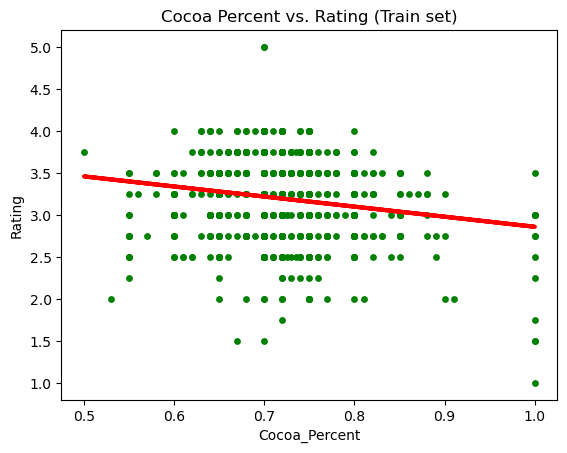

In [103]:
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Cocoa Percent vs. Rating (Train set)')
plot_test.xlabel('Cocoa_Percent')
plot_test.ylabel('Rating')
plot_test.show()

The model did not perform well. I do not know what caused possible data bias. It could be because there are such different ratings for the amount of
cacoa_percent. That there is no specific trend. So this data is not linear and has a lot of possible reasons into what goes cacao_percent and 
ratings